Esse pequeno projeto tem como objetivo analisar a base de dados da pesquisa realizado pelo Stack Overflow, disponível em ->
https://www.kaggle.com/datasets/dheemanthbhat/stack-overflow-annual-developer-survey-2022?resource=download

Dicionário de Variáveis encontradas na base:

- MainBranch  
- Employment  
- RemoteWork  
- CodingActivities  
- EdLevel  
- LearnCode  
- LearnCodeOnline  
- LearnCodeCoursesCert  
- YearsCode  
- YearsCodePro  
- DevType  
- OrgSize  
- PurchaseInfluence  
- BuyNewTool  
- Country  
- Currency  
- CompTotal  
- CompFreq  
- LanguageHaveWorkedWith  
- LanguageWantToWorkWith  
- DatabaseHaveWorkedWith  
- DatabaseWantToWorkWith  
- PlatformHaveWorkedWith  
- PlatformWantToWorkWith  
- WebframeHaveWorkedWith  
- WebframeWantToWorkWith  
- MiscTechHaveWorkedWith  
- MiscTechWantToWorkWith  
- ToolsTechHaveWorkedWith  
- ToolsTechWantToWorkWith  
- NEWCollabToolsHaveWorkedWith  
- NEWCollabToolsWantToWorkWith  
- OpSysProfessional use  
- OpSysPersonal use  
- VersionControlSystem  
- VCInteraction  
- VCHostingPersonal use  
- VCHostingProfessional use  
- OfficeStackAsyncHaveWorkedWith  
- OfficeStackAsyncWantToWorkWith  
- OfficeStackSyncHaveWorkedWith  
- OfficeStackSyncWantToWorkWith  
- Blockchain  
- NEWSOSites  
- SOVisitFreq  
- SOAccount  
- SOPartFreq  
- SOComm  
- Age  
- Gender  
- Trans  
- Sexuality  
- Ethnicity  
- Accessibility  
- MentalHealth  
- TBranch  
- ICorPM  
- WorkExp  
- Knowledge_1  
- Knowledge_2  
- Knowledge_3  
- Knowledge_4  
- Knowledge_5  
- Knowledge_6  
- Knowledge_7  
- Frequency_1  
- Frequency_2  
- Frequency_3  
- TimeSearching  
- TimeAnswering  
- Onboarding  
- ProfessionalTech  
- TrueFalse_1  
- TrueFalse_2  
- TrueFalse_3  
- SurveyLength  
- SurveyEase  
- ConvertedCompYearly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import norm

In [2]:
dataset = r"C:\Users\Roberth Lourenço\OneDrive\Área de Trabalho\Pasta Projeto Repositorio\Repositorio_1\AnaliseExploratoria\Datasets"
file_path = os.path.join(dataset, "survey_results_public.csv")

In [3]:
# Padronizando formato gráfico
sns.set()
sns.set_context("poster")

In [4]:
# Lendo arquivo
df = pd.read_csv(file_path, sep=",", index_col="ResponseId")
df.head(3)

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [5]:
df['Age']

ResponseId
1                    NaN
2                    NaN
3        25-34 years old
4        35-44 years old
5        25-34 years old
              ...       
73264    25-34 years old
73265    25-34 years old
73266    55-64 years old
73267    55-64 years old
73268    25-34 years old
Name: Age, Length: 73268, dtype: object

In [6]:
df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [7]:
# Calculando o share dos valores na coluna Age
df['Age'].value_counts(normalize=True, dropna=False).apply(lambda p: f'{100 * p:.2f}%')

Age
25-34 years old       38.37%
18-24 years old       22.72%
35-44 years old       19.09%
45-54 years old        7.21%
Under 18 years old     5.28%
NaN                    3.17%
55-64 years old        2.70%
65 years or older      0.76%
Prefer not to say      0.71%
Name: proportion, dtype: object

In [8]:
# Adicionando coluna de com condicao mapeando valores
mapa_idades = {
    "Under 18 years old": "[00-18]",
    "18-24 years old": "[18-24]",
    "25-34 years old": "[25-34]",
    "35-44 years old": "[35-44]",
    "55-64 years old": "[55-64]",
    "65 years or older": "[??-??]",
    "Prefer not to say": "[??-??]",
    np.NaN:              "[??-??]",
}

df["AgeRange"] = df["Age"].map(mapa_idades)
df["AgeRange"].value_counts(dropna=False)

AgeRange
[25-34]    28112
[18-24]    16646
[35-44]    13988
NaN         5281
[00-18]     3866
[??-??]     3397
[55-64]     1978
Name: count, dtype: int64

In [9]:
# Filtrando novo df sem valor nulo
df2 = df.loc[df["AgeRange"] != "[??-??]"]
df2["AgeRange"].value_counts(dropna=False)

AgeRange
[25-34]    28112
[18-24]    16646
[35-44]    13988
NaN         5281
[00-18]     3866
[55-64]     1978
Name: count, dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


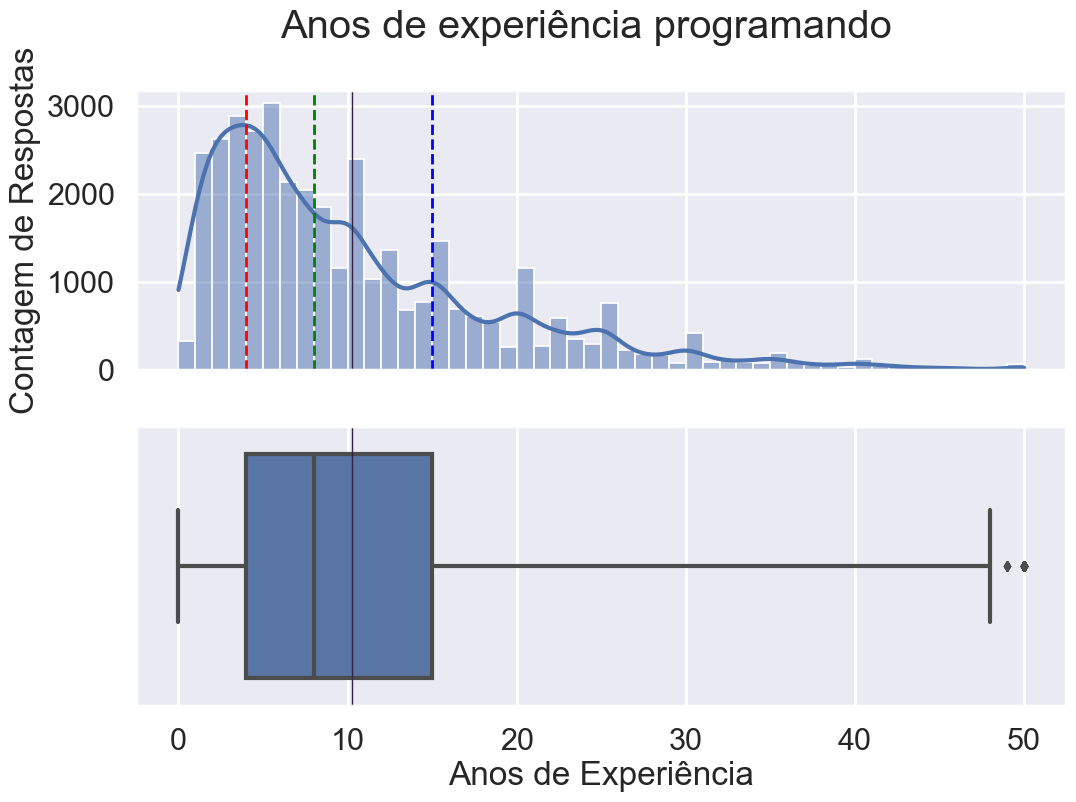

In [10]:
# Criando gráficos de Violino e Boxplot

# === Definindo argumentos de um gráfico dentro de variáveis === 
quantile_args = {
    "linewidth": 2,
    "linestyle": "--",
}

mean_args = {
    "linewidth": 1,
    "color": "#342345",
    "linestyle": "-",
}

# === Criando gráfico com duas linhas de axis
fig, (ax_cima, ax_baixo) = plt.subplots(figsize=(12, 8), nrows=2, sharex=True)

# === Definindo valores do gráfico === 
sns.histplot(data=df, ax=ax_cima, x="WorkExp", binwidth=1, kde=True)

# === Criando colunas no gráfico para apresentar os quartis e personalizando as cores ===
quartil_colors = ["red", "green", "blue"]  # Cores para Q1, Mediana, Q3
for q, color in zip([0.25, 0.5, 0.75], quartil_colors):
    ax_cima.axvline(df["WorkExp"].quantile(q), color=color, **quantile_args)

# === Criando coluna da média da coluna WorkExp com argumentos definidos ===
ax_cima.set_ylabel("Contagem de Respostas")
ax_cima.axvline(df["WorkExp"].mean(), **mean_args)

# === Criando gráfico de Boxplot ===
sns.boxplot(data=df, ax=ax_baixo, x="WorkExp", whis=3.0)
ax_baixo.set_xlabel("Anos de Experiência")
ax_baixo.axvline(df["WorkExp"].mean(), **mean_args)

# Título geral do gráfico
fig.suptitle("Anos de experiência programando")

# Salvar o gráfico
plt.savefig("Grafico_Violiono_Boxplot.png", dpi=300, bbox_inches="tight")

# Mostrar o gráfico
plt.show()


### Histogramas e Boxplot: Análise da Experiência em Programação  

- **Histograma**: Esse gráfico mostra a distribuição das respostas em relação aos anos de experiência em programação. As linhas tracejadas representam os quartis:  
  - A linha **vermelha** (25%) indica que **25% dos programadores têm até 4 anos de experiência**.  
  - A linha **verde** (50%) marca a **mediana**, mostrando que **50% dos programadores têm até 8 anos de experiência**.  
  - A linha **azul** (75%) indica que **75% dos programadores têm até 15 anos de experiência**.  

- **Boxplot**: Esse gráfico evidencia a dispersão dos dados e a presença de **outliers**. Notamos que programadores com mais de **48 anos de experiência** são considerados **outliers**, indicando que esses valores estão significativamente acima do padrão.  

- **Linha azul**: Presente em ambos os gráficos, essa linha representa a **média** de anos de experiência em programação.

In [11]:
# Visualizando os quartis da coluna WorkExp
df["WorkExp"].quantile(0.25), df["WorkExp"].quantile(0.50), df["WorkExp"].quantile(0.75)


(4.0, 8.0, 15.0)

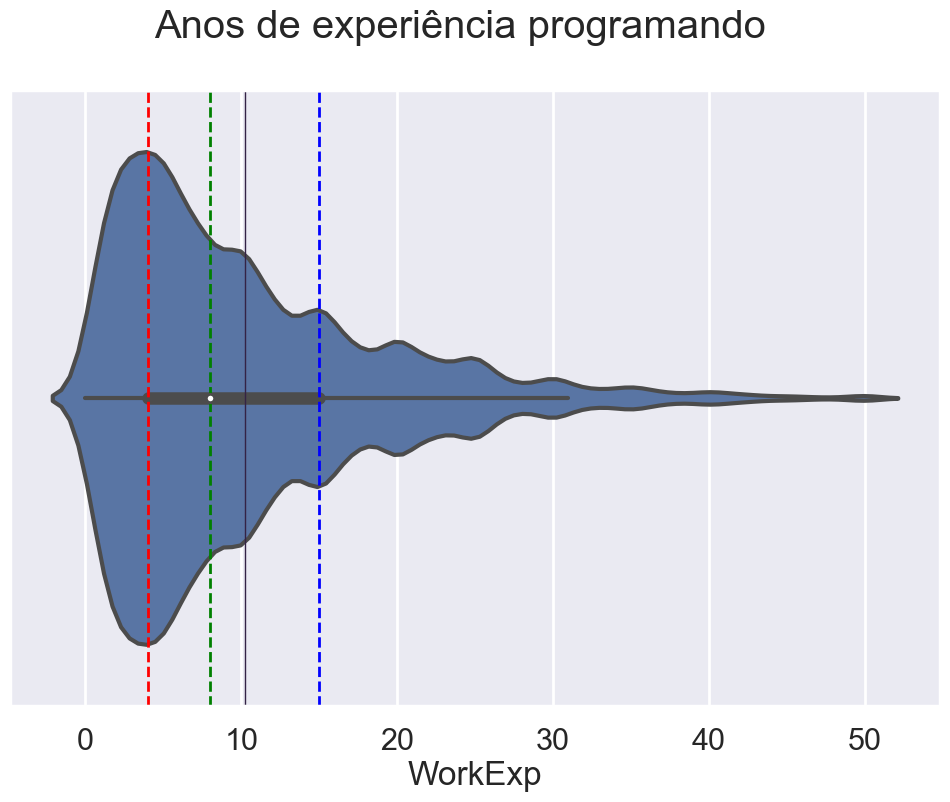

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Definindo argumentos para os quartis com cores diferentes ===
quantile_colors = {
    0.25: "red",
    0.50: "green",
    0.75: "blue"
}

quantile_args = {
    "linewidth": 2,
    "linestyle": "--"
}

mean_args = {
    "linewidth": 1,
    "color": "#342345",
    "linestyle": "-"
}

# === Definindo tamanho do gráfico ===
fig, ax = plt.subplots(figsize=(12, 8))

# === Criando gráfico de violino ===
sns.violinplot(data=df, ax=ax, x="WorkExp")

# === Criando linhas para os quartis com cores diferentes ===
for q, color in quantile_colors.items():
    ax.axvline(df["WorkExp"].quantile(q), color=color, **quantile_args)

# === Criando linha para a média ===
ax.axvline(df["WorkExp"].mean(), **mean_args)

fig.suptitle("Anos de experiência programando")

plt.show()


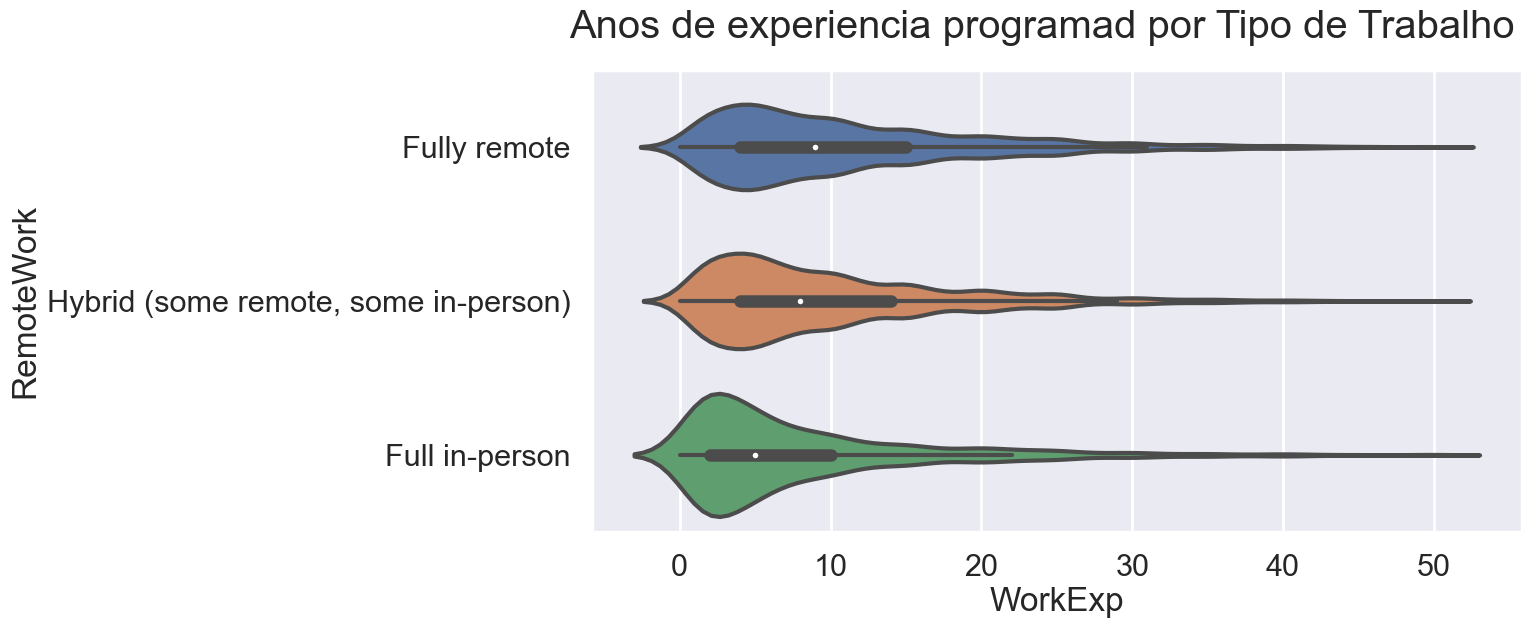

In [13]:
# Criando grafico de violino por modalidade de trabalho

# === Definindo tamanho do grafico ===
fig, ax = plt.subplots(figsize=(12, 6))

# === Criando grafico definindo parametros ===
sns.violinplot(data=df, ax=ax, x="WorkExp", y="RemoteWork")

fig.suptitle("Anos de experiencia programad por Tipo de Trabalho")

plt.show()

In [14]:
# Criando coluna para para se trabalhou ou nao com a linguagem python
df["WorkedWithPython"] = df["LanguageHaveWorkedWith"].str.contains("Python")
df["WorkedWithPython"].value_counts(normalize=True, dropna=False).apply(lambda p: f"{100 * p:.2f}%")

WorkedWithPython
False    50.25%
True     46.62%
NaN       3.13%
Name: proportion, dtype: object

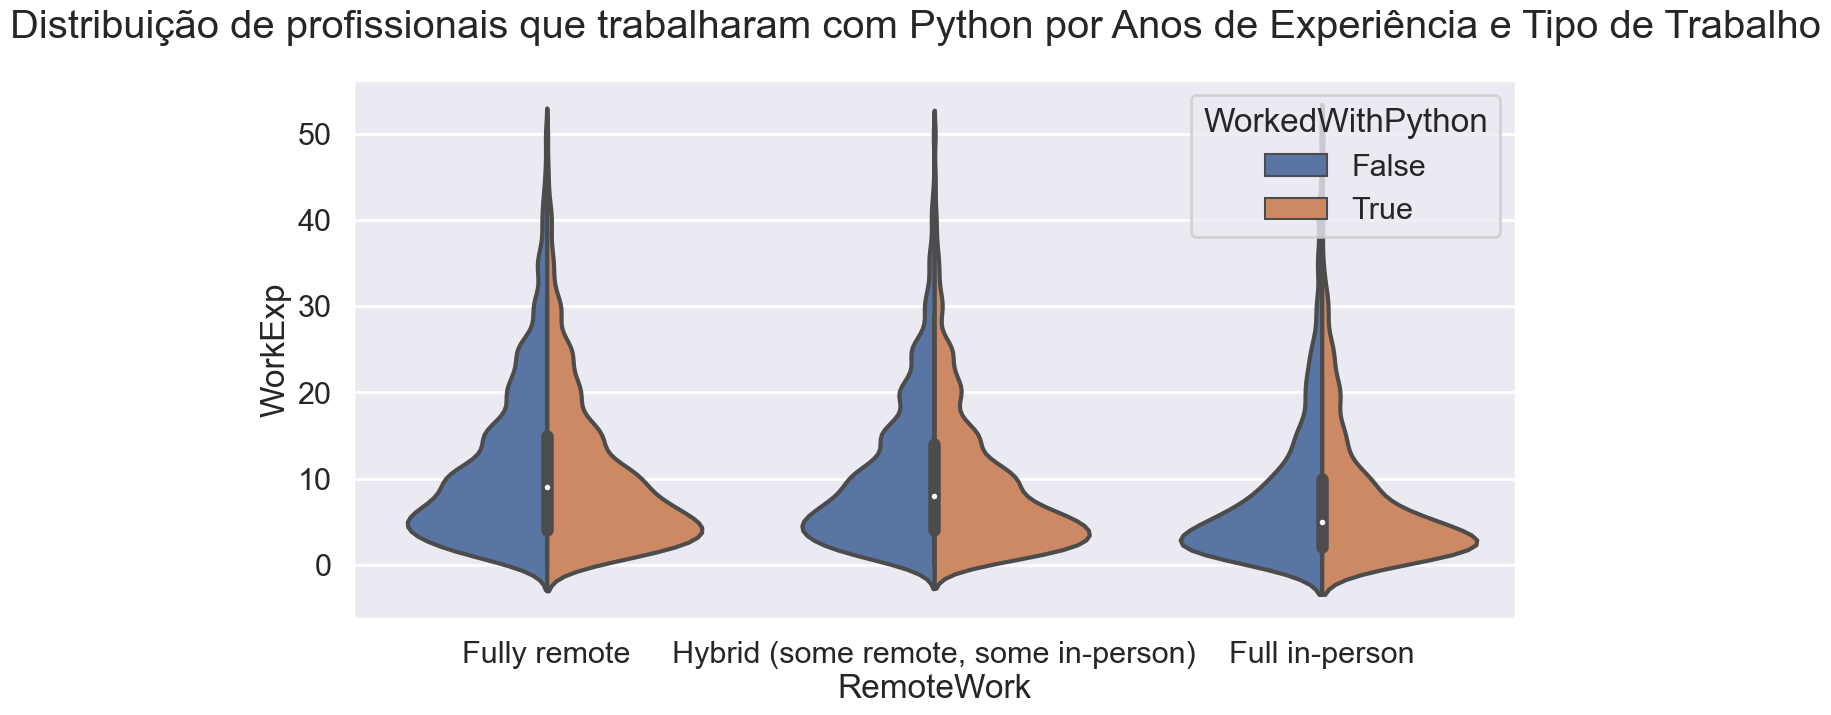

In [15]:
# Criando grafico de Violino com a coluna WorkedWithPython

# === Definindo tamanho do grafico ===
fig, ax = plt.subplots(figsize=(15, 7))

# === Defininindo parametros do grafico e coluna WorkedWithPython como legenda ===
sns.violinplot(data=df, ax=ax, y="WorkExp", x="RemoteWork", hue="WorkedWithPython", split=True)

fig.suptitle("Distribuição de profissionais que trabalharam com Python por Anos de Experiência e Tipo de Trabalho")

plt.show()

In [16]:
round(df.groupby(["RemoteWork", "WorkedWithPython"])["WorkExp"].agg(["mean", "median"]), 1)

mean  median
RemoteWork                           WorkedWithPython              
Full in-person                       False              8.3     5.0
                                     True               7.7     5.0
Fully remote                         False             11.6     9.0
                                     True              10.6     8.0
Hybrid (some remote, some in-person) False             10.6     8.0
                                     True               9.3     7.0

### Conclusão  

Com base na análise dos dados, podemos destacar os seguintes insights:  

- **Análise por Quartis:**  
  - **25%** dos programadores têm até **4 anos de experiência**.  
  - **50%** (mediana) têm até **8 anos de experiência**.  
  - **75%** dos programadores têm até **15 anos de experiência**.  

- **Outliers:**  
  - Programadores com **mais de 48 anos de experiência** são considerados **outliers**, indicando valores significativamente acima da distribuição normal.  

- **Tipos de Trabalho:**  
  - Profissionais com **menos anos de experiência** tendem a trabalhar presencialmente.  
  - A **mediana** de experiência para quem trabalha **remotamente** é de aproximadamente **10 anos**.  
  - A tendência sugere que, ao longo da carreira, os programadores começam em **trabalho presencial**, passam por **modelos híbridos** e, com mais experiência, migram para o **trabalho remoto**.  

- **Profissionais que trabalham com Python:**  
  - Possuem **média e mediana de experiência menores** em comparação com aqueles que não utilizam Python.  
  - Têm uma **pequena vantagem** na mediana de experiência ao ingressar em **trabalho totalmente remoto**.